In [1]:
#Import drive
from google.colab import drive
#Mount Google Drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/Colab Notebooks/Sebastian

/content/drive/MyDrive/Colab Notebooks/Sebastian


Stuff for commiting to Github below

In [ ]:
ROOT = '/content/drive"'

In [ ]:
from os.path import join  

# path to your project on Google Drive
MY_GOOGLE_DRIVE_PATH = 'drive/MyDrive/Colab Notebooks/Sebastian' 
# replace with your Github username 
GIT_USERNAME = "ahhuang007" 
# definitely replace with your
GIT_TOKEN = "new token"  
# Replace with your github repository in this case we want 
# to clone deep-learning-v2-pytorch repository
GIT_REPOSITORY = "Sebastian" 

PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)

# It's good to print out the value if you are not sure 
print("PROJECT_PATH: ", PROJECT_PATH)   

# In case we haven't created the folder already; we will create a folder in the project path     

#GIT_PATH = "https://{GIT_TOKEN}@github.com/{GIT_USERNAME}/{GIT_REPOSITORY}.git" this return 400 Bad Request for me
#GIT_PATH = "https://" + GIT_TOKEN + "@github.com/" + GIT_USERNAME + "/" + GIT_REPOSITORY + ".git"
#print("GIT_PATH: ", GIT_PATH)

PROJECT_PATH:  /content/drive"/drive/MyDrive/Colab Notebooks/Sebastian


In [23]:
!git add .

In [24]:
!git config --global user.email "ahhuang007@gmail.com"
!git config --global user.name "ahhuang007"

In [25]:
!git commit -m "testing new reward function"

[main 6d0134f] testing new reward function
 8 files changed, 501763 insertions(+), 2 deletions(-)
 rewrite colab.ipynb (91%)
 rewrite gym-seb/gym_seb/envs/__pycache__/seb_env.cpython-37.pyc (67%)
 create mode 100644 models/random_model_ppo_v4.zip
 create mode 100644 models/real_model_ppo_v4.zip
 create mode 100644 ppo_rewards_v4.csv


In [25]:
!git remote set-url origin https://$git_key@github.com/ahhuang007/Sebastian.git

Had to reset the remote origin URL here, removed the code since it contained the personal authorization token. Now I set the git key as an environment variable.

--------

Command for pulling from github

In [27]:
!git pull origin

remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 12 (delta 5), reused 11 (delta 4), pack-reused 0
Unpacking objects: 100% (12/12), done.
From https://github.com/ahhuang007/Sebastian
   6d0134f..ff5e438  main       -> origin/main
Updating 6d0134f..ff5e438
Fast-forward
 gym-seb/gym_seb/__pycache__/__init__.cpython-37.pyc   | Bin 351 -> 344 bytes
 .../gym_seb/envs/__pycache__/__init__.cpython-37.pyc  | Bin 287 -> 280 bytes
 .../gym_seb/envs/__pycache__/seb_env.cpython-37.pyc   | Bin 4849 -> 4842 bytes
 gym-seb/gym_seb/envs/seb_env.py                       |   2 +-
 viz.py                                                |  10 +++++-----
 5 files changed, 6 insertions(+), 6 deletions(-)


In [26]:
!git push origin

Counting objects: 16, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (16/16), done.
Writing objects: 100% (16/16), 6.75 MiB | 3.13 MiB/s, done.
Total 16 (delta 5), reused 0 (delta 0)
remote: Resolving deltas: 100% (5/5), completed with 5 local objects.
To https://github.com/ahhuang007/Sebastian.git
   4cd0b9e..6d0134f  main -> main


Installing stable_baselines since it might be better

In [ ]:
%cd ..

/content/drive/MyDrive/Colab Notebooks


In [30]:
!pip install stable-baselines3[extra]

     |████████████████████████████████| 1.6 MB 5.2 MB/s 
  Created wheel for gym: filename=gym-0.19.0-py3-none-any.whl size=1663114 sha256=b1b6dd32940da540d752a64d298cd2e046753c5fcd2109875721b7c96bc9efb2
  Stored in directory: /root/.cache/pip/wheels/ef/9d/70/8bea53f7edec2fdb4f98d9d64ac9f11aea95dfcb98099d7712
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.21.0
    Uninstalling gym-0.21.0:
      Successfully uninstalled gym-0.21.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym-seb 0.0.5 requires gym>=0.20.0, but you have gym 0.19.0 which is incompatible.


Installing my custom environment

In [ ]:
cd Sebastian

[Errno 2] No such file or directory: 'Sebastian'
/content


In [2]:
%cd gym-seb

/content/drive/My Drive/Colab Notebooks/Sebastian/gym-seb


In [3]:
!pip install -e .

Obtaining file:///content/drive/My%20Drive/Colab%20Notebooks/Sebastian/gym-seb
  Attempting uninstall: gym-seb
    Found existing installation: gym-seb 0.0.5
    Can't uninstall 'gym-seb'. No files were found to uninstall.
  Running setup.py develop for gym-seb


Restart runtime here

In [1]:
%cd drive/My Drive/Colab Notebooks/Sebastian

/content/drive/My Drive/Colab Notebooks/Sebastian


In [2]:
from stable_baselines3 import DDPG, PPO
import gym

In [3]:
import gym_seb
env = gym.make('seb-v0', episode_timesteps = 10000, use_gui = False)

In [4]:
from stable_baselines3.common.env_checker import check_env

check_env(env, warn=True)

resetting environment


In [5]:
from stable_baselines3.ddpg.policies import MlpPolicy
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise

In [6]:
'''
model finished running when "doneness" was achievable - do i need to do this?
I think the model will keep learning until it is done - if it is done but 
has not reached the number of total timesteps, it will reset and learn again
until it has surpassed the total_timesteps and is done again
'''

model = PPO('MlpPolicy', env, verbose = 1)
model.set_random_seed(4)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [7]:
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.results_plotter import load_results, ts2xy

class Recorder(BaseCallback):
  '''
  callback for recording data
  '''
  def __init__(self, li, log_dir, verbose = 1):
    super(Recorder, self).__init__(verbose)
    self.li = li
    self.log_dir = log_dir
  
  def _on_step(self) -> bool:
    #x, y = ts2xy(load_results(self.log_dir), 'timesteps')
    self.li.append(self.locals['rewards'][0])


In [8]:
from stable_baselines3.common.evaluation import evaluate_policy

#performance with random model
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10, deterministic=True)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


resetting environment
at episode 10000
-0.021034676557723845
maximum timestep reached for episode
resetting environment
at episode 20000
-0.02103537445388876
maximum timestep reached for episode
resetting environment
at episode 30000
-0.021031209767744575
maximum timestep reached for episode
resetting environment
at episode 40000
-0.021023116419558563
maximum timestep reached for episode
resetting environment
at episode 50000
-0.021023430125217825
maximum timestep reached for episode
resetting environment
at episode 60000
-0.021032600478138312
maximum timestep reached for episode
resetting environment
at episode 70000
-0.021032547545228146
maximum timestep reached for episode
resetting environment
at episode 80000
-0.02103244429722991
maximum timestep reached for episode
resetting environment
at episode 90000
-0.021032476424084477
maximum timestep reached for episode
resetting environment
at episode 100000
-0.02103254118327868
maximum timestep reached for episode
resetting environment


In [9]:
model.save("models/random_model_ppo_v5")

In [7]:
ppo_model = PPO.load("real_model_ppo_action", env = env)
ppo_model.set_random_seed(4)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [10]:
ppo_model = PPO('MlpPolicy', env, verbose = 1)
ppo_model.set_random_seed(4)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [11]:
data = []
record = Recorder(data, log_dir = "/")

In [16]:
env.reset()
#set total_timesteps equal to n_eval_episodes * max_timesteps
#model will go through 2048*x timsteps, where total_timesteps will be rounded up
#to nearest multiple of 2048
#action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

ppo_model = ppo_model.learn(total_timesteps = 100000, log_interval = 10000, callback = record)
ppo_model.save("models/real_model_ppo_v5")

resetting environment
resetting environment
robot has flipped over at timestep 501474
resetting environment
robot has flipped over at timestep 501517
resetting environment
robot has flipped over at timestep 501558
resetting environment
robot has flipped over at timestep 501599
resetting environment
robot has flipped over at timestep 501640
resetting environment
robot has flipped over at timestep 501685
resetting environment
robot has flipped over at timestep 501728
resetting environment
robot has flipped over at timestep 501771
resetting environment
robot has flipped over at timestep 501813
resetting environment
robot has flipped over at timestep 501860
resetting environment
robot has flipped over at timestep 501902
resetting environment
robot has flipped over at timestep 501954
resetting environment
robot has flipped over at timestep 502008
resetting environment
robot has flipped over at timestep 502053
resetting environment
robot has flipped over at timestep 502101
resetting environm

In [17]:
from stable_baselines3.common.evaluation import evaluate_policy
mean_reward, std_reward = evaluate_policy(ppo_model, env, n_eval_episodes=10, deterministic=True)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


resetting environment
at episode 610000
-0.03085149804851382
maximum timestep reached for episode
resetting environment
robot has flipped over at timestep 611827
resetting environment
robot has flipped over at timestep 611867
resetting environment
robot has flipped over at timestep 611906
resetting environment
robot has flipped over at timestep 611946
resetting environment
robot has flipped over at timestep 611988
resetting environment
robot has flipped over at timestep 612029
resetting environment
robot has flipped over at timestep 612070
resetting environment
robot has flipped over at timestep 612111
resetting environment
robot has flipped over at timestep 612151
resetting environment
mean_reward=-31.11 +/- 90.71417930941982


Plotting

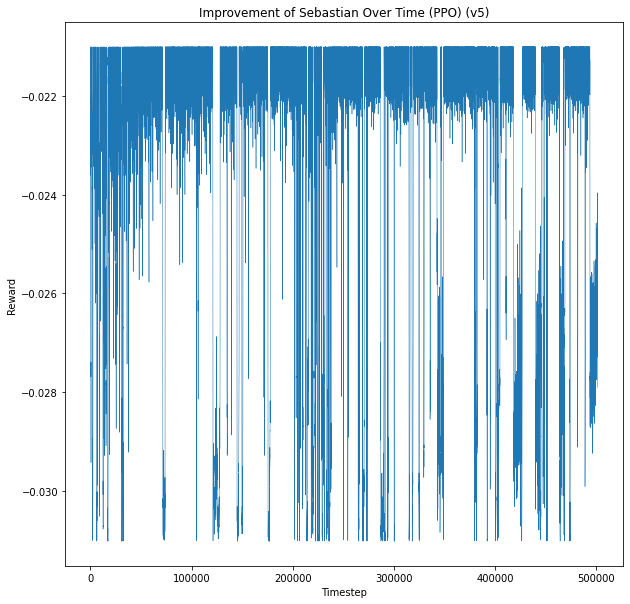

In [19]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams["figure.figsize"]=(10,10)
xs = range(1, len(data) + 1)
plt.plot(xs, data, linewidth = 0.5)
plt.xlabel("Timestep")
plt.ylabel("Reward")
plt.title("Improvement of Sebastian Over Time (PPO) (v5)")
plt.show()

So, yeah, my algorithm's improving but it still needs to improve a lot more. It would appear that PPO is better than DDPG, so I think I'll be working with PPO from here on out.

Possible methods of improvement: Expanding observation space to include joint angles/velocities (done), contact forces, rotation matrix, increase reward based on velocity and magnitude of action taken, 

In [ ]:
#Testing TD3
from stable_baselines3 import TD3
td3_model = TD3('MlpPolicy', env, verbose = 1)
td3_model.set_random_seed(4)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy

#performance with random model
mean_reward, std_reward = evaluate_policy(td3_model, env, n_eval_episodes=10, deterministic=True)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


resetting environment
robot has flipped over at timestep 1114318
resetting environment
at episode 1120000
-1.541983962059021
maximum timestep reached for episode
resetting environment
at episode 1130000
-1.4691083431243896
maximum timestep reached for episode
resetting environment
at episode 1140000
-2.7713000774383545
maximum timestep reached for episode
resetting environment
at episode 1150000
-1.830146312713623
maximum timestep reached for episode
resetting environment
at episode 1160000
-1.852158546447754
maximum timestep reached for episode
resetting environment
at episode 1170000
-0.8908807039260864
maximum timestep reached for episode
resetting environment
robot has flipped over at timestep 1174587
resetting environment
robot has flipped over at timestep 1176486
resetting environment
robot has flipped over at timestep 1176766
resetting environment
mean_reward=-11838.14 +/- 8694.458009957501


In [ ]:
td3_model.save("random_model_td3")

In [ ]:
td3_model = TD3.load("real_model_td3", env = env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
class TD3Recorder(BaseCallback):
  '''
  callback for recording data
  '''
  def __init__(self, li, log_dir, verbose = 1):
    super(TD3Recorder, self).__init__(verbose)
    self.li = li
    self.log_dir = log_dir
  
  def _on_step(self) -> bool:
    #x, y = ts2xy(load_results(self.log_dir), 'timesteps')
    self.li.append(self.locals['episode_reward'])


In [ ]:
data2 = []
record = TD3Recorder(data2, log_dir = "/")

In [ ]:
env.reset()
#set total_timesteps equal to n_eval_episodes * max_timesteps
#Setting for loop so we can train in pieces in case colab kicks us off

td3_model = td3_model.learn(total_timesteps = 100000, log_interval = 100, callback = record)
td3_model.save("real_model_td3")

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy
mean_reward, std_reward = evaluate_policy(ddpg_model, env, n_eval_episodes=10, deterministic=True)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

In [21]:
import pandas as pd
df = pd.DataFrame(data = {"timestep":range(1,len(data) + 1), "reward":data})

In [22]:
df.to_csv("ppo_rewards_v4.csv")